# Exploratory Analysis

 This is the exploratory analysis based on the rodent inspection in New York. This analysis is aimed to analyze the rodent inspection requirements in New York over the past 10 years to predict the rodent population change in New York. The dataset is downloaded from https://data.cityofnewyork.us/Health/Rodent-Inspection/p937-wjvj, 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd

In [2]:
df = pd.read_csv('Rodent_Inspection.csv')
df.head(5)

,INSPECTION_TYPE,JOB_TICKET_OR_WORK_ORDER_ID,JOB_ID,JOB_PROGRESS,BBL,BORO_CODE,BLOCK,LOT,HOUSE_NUMBER,STREET_NAME,ZIP_CODE,X_COORD,Y_COORD,LATITUDE,LONGITUDE,BOROUGH,INSPECTION_DATE,RESULT,APPROVED_DATE,LOCATION
0,INITIAL,1477376,PO1477376,1,3030820047,3,3082,47,71,WHITE ST,11206.0,1002123.0,196551.0,40.706139,-73.935536,Brooklyn,08/02/2017 02:27:38 PM,Active Rat Signs,08/04/2017 09:20:05 AM,"(40.706138857298, -73.935535793927)"
1,INITIAL,1475045,PO1475045,1,4114050014,4,11405,14,90-14,SPRITZ ROAD,11417.0,1027048.0,184240.0,40.672262,-73.845715,Queens,08/03/2017 09:55:13 AM,Passed Inspection,08/04/2017 03:38:17 PM,"(40.672262220686, -73.845715127375)"
2,INITIAL,1452020,PO1452020,1,5047260021,5,4726,21,566,PENDALE STREET,10306.0,950078.0,142898.0,40.558825,-74.122979,Staten Island,08/04/2017 03:45:29 PM,Passed Inspection,08/07/2017 10:33:10 AM,"(40.558825095548, -74.12297853578)"
3,INITIAL,1477484,PO1477484,1,3064370028,3,6437,28,173,BAY 19TH STREET,11214.0,982644.0,159091.0,40.603337,-74.005784,Brooklyn,08/01/2017 02:00:29 PM,Passed Inspection,08/07/2017 01:54:46 PM,"(40.603337405696, -74.005783555146)"
4,INITIAL,1461449,PO1461449,1,2022800130,2,2280,130,448,EAST 136TH STREET,10454.0,1005678.0,233399.0,40.807270,-73.922596,Bronx,08/04/2017 09:55:51 AM,Passed Inspection,08/07/2017 09:43:00 AM,"(40.807269769566, -73.922595760958)"


To understand the trend, I firstly plot the total Roment innpection number in New York over the past 10 years, and it is clearly showed that the inspection times is increasing in recent 4 years(2016-2019)

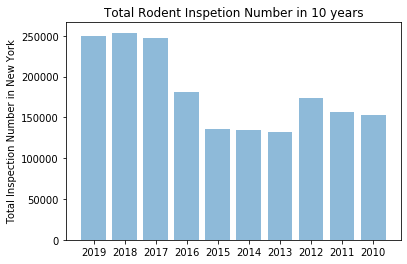

In [3]:
date = list(df['APPROVED_DATE'])
years = []
for i in date:
    year = str(i).split()[0][6:11]
    years.append(year)
df['year'] = years
df_2019 = df[(df['year'] == '2019')]
df_2018 = df[(df['year'] == '2018')]
df_2017 = df[(df['year'] == '2017')]
df_2016 = df[(df['year'] == '2016')]
df_2015 = df[(df['year'] == '2015')]
df_2014 = df[(df['year'] == '2014')]
df_2013 = df[(df['year'] == '2013')]
df_2012 = df[(df['year'] == '2012')]
df_2011 = df[(df['year'] == '2011')]
df_2010 = df[(df['year'] == '2010')]
total_inspection = [len(df_2019), len(df_2018), len(df_2017),len(df_2016),len(df_2015),len(df_2014),
                   len(df_2013), len(df_2012), len(df_2011), len(df_2010)]
years = np.arange(2010, 2020)[::-1]
y_pos = np.arange(len(years))
plt.bar(y_pos, total_inspection, align='center', alpha=0.5)
plt.xticks(y_pos, years)
plt.ylabel('Total Inspection Number in New York')
plt.title('Total Rodent Inspetion Number in 10 years')
plt.show()

I also want to look at which area has the most inspection number in 2019 based on zip code, which means at that area the rodent population is the highest. By comparing the data from 2017-2019, the region with most rodent population can be selected according to the comparison among the three figures.

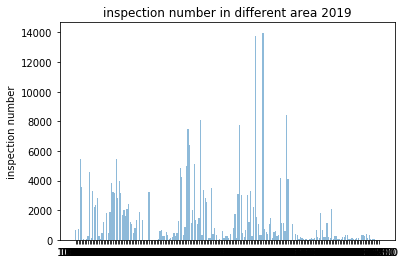

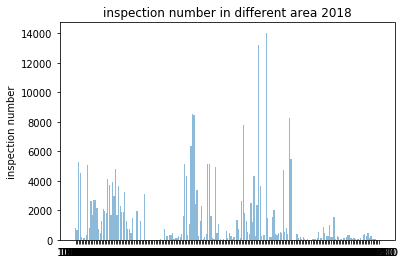

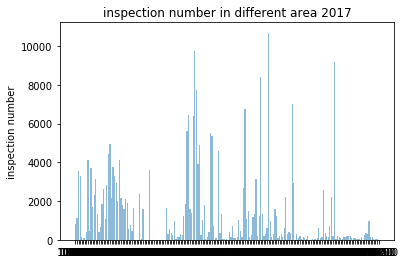

In [4]:
df_10 = pd.concat([df_2019, df_2018, df_2017, df_2016, df_2015, df_2014, df_2013, df_2012, df_2011, df_2010])
df_date = df_10.groupby(['year'])
#df_it.groups.keys()

df_2019 = df_date.get_group('2019')
df_2019_zc = df_2019.groupby('ZIP_CODE')
keys = list(df_2019_zc.groups.keys())
inspection_nums = []
for key in keys:
    inspection_num = len(df_2019_zc.get_group(key).loc[:, 'INSPECTION_TYPE'])
    inspection_nums.append(inspection_num)
y_pos = np.arange(len(keys))
plt.bar(y_pos, inspection_nums, align='center', alpha=0.5)
plt.xticks(y_pos, keys)
plt.ylabel('inspection number')
plt.title('inspection number in different area 2019')
plt.show()
df_2018 = df_date.get_group('2018')
df_2018_zc = df_2018.groupby('ZIP_CODE')
keys = list(df_2018_zc.groups.keys())
inspection_nums = []
for key in keys:
    inspection_num = len(df_2018_zc.get_group(key).loc[:, 'INSPECTION_TYPE'])
    inspection_nums.append(inspection_num)
y_pos = np.arange(len(keys))
plt.bar(y_pos, inspection_nums, align='center', alpha=0.5)
plt.xticks(y_pos, keys)
plt.ylabel('inspection number')
plt.title('inspection number in different area 2018')
plt.show()
df_2017 = df_date.get_group('2017')
df_2017_zc = df_2017.groupby('ZIP_CODE')
keys = list(df_2017_zc.groups.keys())
inspection_nums = []
for key in keys:
    inspection_num = len(df_2017_zc.get_group(key).loc[:, 'INSPECTION_TYPE'])
    inspection_nums.append(inspection_num)
y_pos = np.arange(len(keys))
plt.bar(y_pos, inspection_nums, align='center', alpha=0.5)
plt.xticks(y_pos, keys)
plt.ylabel('inspection number')
plt.title('inspection number in different area 2017')
plt.show()